<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [2]:
print(torch.cuda.is_available())

if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))

tensor = torch.tensor([1, 2, 3])
print(tensor.device)

False
cpu


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [4]:
print(torch.cuda.is_available())

if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))

tensor = torch.tensor([1, 2, 3])
print(tensor.device)

True
1
Tesla T4
cpu


# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [3]:
tensor = torch.randn(2, 3)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)
print(tensor.requires_grad)

torch.Size([2, 3])
torch.float32
cpu
False


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [5]:
tensor1 = torch.randn(100)
tensor2 = torch.randn(100)

mae = torch.mean(torch.abs(tensor1 - tensor2))

mae.item()

1.0551221370697021

# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [6]:
tensor1 = torch.randn(32, 28, 28)
tensor2 = torch.randn(16, 28, 28)
tensor3 = torch.randn(64, 28, 28)

tensor = torch.cat((tensor1, tensor2, tensor3), dim=0)

tensor.shape

torch.Size([112, 28, 28])

# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [11]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

x = torch.tensor(-2.0, requires_grad=True)
learning_rate = 1e-1

moment = torch.tensor(0.0)
beta = 0.99

for t in range(2000):
    loss = f(x)

    loss.backward()

    if t % 100 == 0:
      print(f'{loss.item()=}')

    with torch.no_grad():
      moment = beta*moment + learning_rate*x.grad
      x -= moment

      x.grad = None

loss.item()=1.3333332538604736
loss.item()=1.0998730659484863
loss.item()=0.9519035816192627
loss.item()=0.9664893746376038
loss.item()=0.956887423992157
loss.item()=0.9518420696258545
loss.item()=0.9499042630195618
loss.item()=0.9491894245147705
loss.item()=0.9489275217056274
loss.item()=0.9488318562507629
loss.item()=0.948796808719635
loss.item()=0.9487839341163635
loss.item()=0.9487794041633606
loss.item()=0.9487776160240173
loss.item()=0.9487770795822144
loss.item()=0.9487767815589905
loss.item()=0.9487767219543457
loss.item()=0.9487767219543457
loss.item()=0.9487768411636353
loss.item()=0.9487767219543457


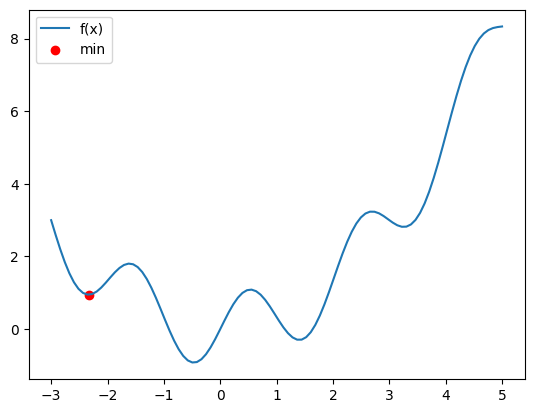

In [12]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [13]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2

In [15]:
from torch.optim import SGD

learning_rate = 1e-2
epochs = 500

x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

optimizer = SGD([x, y],
                lr=learning_rate)

for i in range(epochs):
    loss = f1(x, y)
    loss.backward()

    if i % 5 == 0:
        print(f"Loss on {i} iteration for f1: {loss.item()}")

    optimizer.step()
    optimizer.zero_grad()

print("Мінімум функції f1 досягнуто при x =", x.item(), "і y =", y.item())

Loss on 0 iteration for f1: 835.1488037109375
Loss on 5 iteration for f1: 835.0267333984375
Loss on 10 iteration for f1: 834.904541015625
Loss on 15 iteration for f1: 834.7826538085938
Loss on 20 iteration for f1: 834.6611938476562
Loss on 25 iteration for f1: 834.5403442382812
Loss on 30 iteration for f1: 834.4203491210938
Loss on 35 iteration for f1: 834.3013305664062
Loss on 40 iteration for f1: 834.1835327148438
Loss on 45 iteration for f1: 834.0669555664062
Loss on 50 iteration for f1: 833.951904296875
Loss on 55 iteration for f1: 833.8384399414062
Loss on 60 iteration for f1: 833.7266235351562
Loss on 65 iteration for f1: 833.6165771484375
Loss on 70 iteration for f1: 833.5084838867188
Loss on 75 iteration for f1: 833.40234375
Loss on 80 iteration for f1: 833.2982177734375
Loss on 85 iteration for f1: 833.1962890625
Loss on 90 iteration for f1: 833.0963745117188
Loss on 95 iteration for f1: 832.998779296875
Loss on 100 iteration for f1: 832.9033203125
Loss on 105 iteration for f1

In [16]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

optimizer = SGD([x, y], lr=learning_rate)

for i in range(epochs):
    loss = f2(x, y)
    loss.backward()

    if i % 5 == 0:
        print(f"Loss on {i} iteration for f2: {loss.item()}")

    optimizer.step()
    optimizer.zero_grad()

print("Мінімум функції f2 досягнуто при x =", x.item(), "і y =", y.item())

Loss on 0 iteration for f2: 4.866667747497559
Loss on 5 iteration for f2: 3.205026149749756
Loss on 10 iteration for f2: 2.5653061866760254
Loss on 15 iteration for f2: 2.127171754837036
Loss on 20 iteration for f2: 1.7935703992843628
Loss on 25 iteration for f2: 1.5296543836593628
Loss on 30 iteration for f2: 1.316636323928833
Loss on 35 iteration for f2: 1.142491102218628
Loss on 40 iteration for f2: 0.9989026188850403
Loss on 45 iteration for f2: 0.8798709511756897
Loss on 50 iteration for f2: 0.7809152603149414
Loss on 55 iteration for f2: 0.6985721588134766
Loss on 60 iteration for f2: 0.6300683617591858
Loss on 65 iteration for f2: 0.5731307864189148
Loss on 70 iteration for f2: 0.5258541107177734
Loss on 75 iteration for f2: 0.4866386651992798
Loss on 80 iteration for f2: 0.45413780212402344
Loss on 85 iteration for f2: 0.4272187054157257
Loss on 90 iteration for f2: 0.4049335718154907
Loss on 95 iteration for f2: 0.3864932954311371
Loss on 100 iteration for f2: 0.37124127149581

In [17]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

optimizer = SGD([x, y], lr=learning_rate)

for i in range(epochs):
    loss = f3(x, y)
    loss.backward()

    if i % 5 == 0:
        print(f"Loss on {i} iteration for f3: {loss.item()}")

    optimizer.step()
    optimizer.zero_grad()

print("Мінімум функції f3 досягнуто при x =", x.item(), "і y =", y.item())

Loss on 0 iteration for f3: 109.43253326416016
Loss on 5 iteration for f3: 109.1883316040039
Loss on 10 iteration for f3: 109.0533218383789
Loss on 15 iteration for f3: 108.97702026367188
Loss on 20 iteration for f3: 108.92918395996094
Loss on 25 iteration for f3: 108.8939437866211
Loss on 30 iteration for f3: 108.86380004882812
Loss on 35 iteration for f3: 108.83550262451172
Loss on 40 iteration for f3: 108.8077392578125
Loss on 45 iteration for f3: 108.780029296875
Loss on 50 iteration for f3: 108.75222778320312
Loss on 55 iteration for f3: 108.72434997558594
Loss on 60 iteration for f3: 108.69649505615234
Loss on 65 iteration for f3: 108.66873931884766
Loss on 70 iteration for f3: 108.6412124633789
Loss on 75 iteration for f3: 108.61405181884766
Loss on 80 iteration for f3: 108.58737182617188
Loss on 85 iteration for f3: 108.56130981445312
Loss on 90 iteration for f3: 108.53599548339844
Loss on 95 iteration for f3: 108.51155853271484
Loss on 100 iteration for f3: 108.48811340332031
